In [1]:
import pyaudio as p
import wave as w
import numpy as np
from __future__ import print_function
import librosa
import librosa.display
import IPython.display
import time
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline

C:\Users\Nishant\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [132]:
FORMAT=p.paInt16
CHANNELS=2
RATE=44100 #sampling frequency rate
CHUNK=1024
RECORD_SECONDS=2
WAVE_OUTPUT_FILENAME="authentic.wav"

recording..1
finished recording
recording.. 2
finished recording


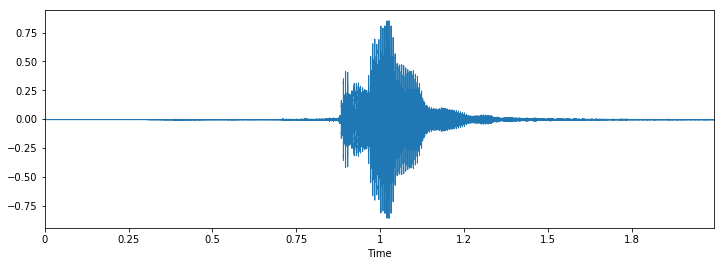

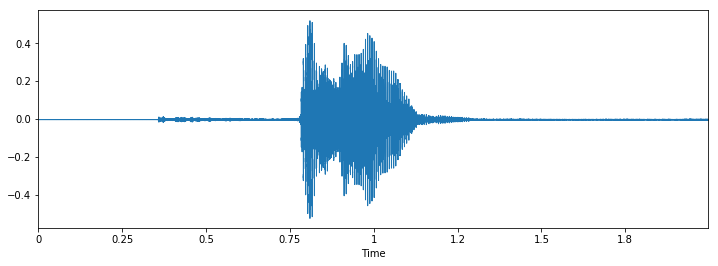

In [174]:
#start recording
audio=p.PyAudio()
stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,output=True,frames_per_buffer=CHUNK)
#for 1st input
print("recording..1")
frames=[]
for j in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
    data=stream.read(CHUNK)
    frames.append(data)
print("finished recording")

#stop recording 
stream.stop_stream()
stream.close()
audio.terminate()

#save file
waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()


#load audio file
audio_path=WAVE_OUTPUT_FILENAME
X,sr=librosa.load(audio_path,res_type='kaiser_fast')

#audio signal
plt.figure(figsize=(12,4))
librosa.display.waveplot(X, sr=sr)

#generate mfcc
mfcc=librosa.feature.mfcc(y=X,sr=sr,n_mfcc=128)
df=mfcc

#sleep
time.sleep(1.2)

for i in range(1):
    audio=p.PyAudio()
    stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,output=True,frames_per_buffer=CHUNK)
    print("recording..",(i+2))
    frames=[]
    for j in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
        data=stream.read(CHUNK)
        frames.append(data)
    print("finished recording")

    #stop recording 
    stream.stop_stream()
    stream.close()
    audio.terminate()
    
    #save file
    waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()
    
    
    #load audio file
    audio_path=WAVE_OUTPUT_FILENAME
    X,sr=librosa.load(audio_path,res_type='kaiser_fast')
    #audio signal
    plt.figure(figsize=(12,4))
    librosa.display.waveplot(X, sr=sr)
    
    #generate mfcc
    mfcc=librosa.feature.mfcc(y=X,sr=sr,n_mfcc=128)
    df=np.concatenate((df,mfcc),axis=0)
    time.sleep(1.2)
    

In [175]:
df.shape

(256, 87)

In [176]:
#display in notebook
IPython.display.Audio(data=X,rate=sr)

In [177]:
label=[]
for i in range(0,256):
    label.append(1)
label= np.array(label)

In [178]:
label.shape

(256,)

# Add another person

In [179]:
FORMAT=p.paInt16
CHANNELS=2
RATE=44100 #sampling frequency rate
CHUNK=1024
RECORD_SECONDS=2
WAVE_OUTPUT_FILENAME="another.wav"

In [180]:
#start recording
audio=p.PyAudio()
stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,frames_per_buffer=CHUNK)
print("recording..")
frames=[]
for i in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
    data=stream.read(CHUNK)
    frames.append(data)
print("finished recording")

#stop recording 
stream.stop_stream()
stream.close()
audio.terminate()

recording..
finished recording


In [181]:
waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

In [182]:
audio_path= WAVE_OUTPUT_FILENAME
X_1,sr_1=librosa.load(audio_path,res_type='kaiser_fast')
#display in notebook
IPython.display.Audio(data=X_1,rate=sr_1)

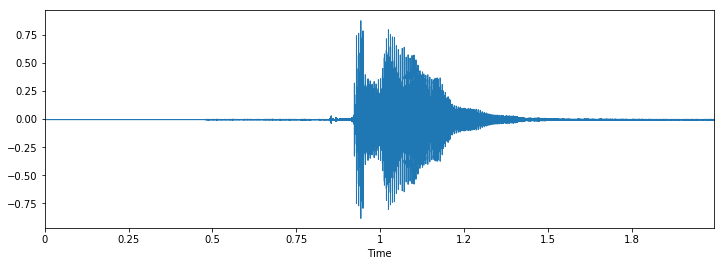

In [183]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(X_1, sr=sr_1)

In [184]:
X_another=librosa.feature.mfcc(y=X_1,sr=sr_1,n_mfcc=128)
X_another.shape

(128, 87)

In [185]:
df.shape

(256, 87)

In [186]:
df=np.concatenate((df,X_another),axis=0)

In [187]:
y_another=[]
for i in range(0,128):
    y_another.append(0)
y_another=np.array(y_another)

In [188]:
y_another

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [189]:
label=np.concatenate((label,y_another),axis=0)

In [190]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Deep learning model

In [191]:
def create_model():
    #build model
    model=Sequential()
    model.add(Dense(256,input_dim=87,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, init='uniform', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    model.summary()
    return model

In [192]:
model=create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               22528     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 130       
Total para

C:\Users\Nishant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
  


In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,label,test_size=0.2,random_state=21)

In [194]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(307, 87) (307,) (77, 87) (77,)


In [195]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [196]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=5,epochs=20)

Train on 307 samples, validate on 77 samples
Epoch 1/20
307/307 [==============================] - 1s 4ms/step - loss: 0.8936 - acc: 0.6189 - val_loss: 0.7933 - val_acc: 0.7532
Epoch 2/20
307/307 [==============================] - 0s 896us/step - loss: 0.7142 - acc: 0.6710 - val_loss: 0.7790 - val_acc: 0.7532
Epoch 3/20
307/307 [==============================] - 0s 866us/step - loss: 0.7460 - acc: 0.6971 - val_loss: 0.7944 - val_acc: 0.7013
Epoch 4/20
307/307 [==============================] - 0s 902us/step - loss: 0.7451 - acc: 0.6938 - val_loss: 0.7881 - val_acc: 0.7273
Epoch 5/20
307/307 [==============================] - 0s 883us/step - loss: 0.6175 - acc: 0.7166 - val_loss: 0.7877 - val_acc: 0.7792
Epoch 6/20
307/307 [==============================] - 0s 902us/step - loss: 0.6020 - acc: 0.7524 - val_loss: 0.7536 - val_acc: 0.6883
Epoch 7/20
307/307 [==============================] - 0s 902us/step - loss: 0.6355 - acc: 0.7524 - val_loss: 0.7261 - val_acc: 0.7532
Epoch 8/20
307/307 

# Testing

In [227]:
FORMAT=p.paInt16
CHANNELS=2
RATE=44100 #sampling frequency rate
CHUNK=1024
RECORD_SECONDS=2
WAVE_OUTPUT_FILENAME="test.wav"
audio=p.PyAudio()

#start recording
stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,frames_per_buffer=CHUNK)
print("recording..")
frames=[]
for i in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
    data=stream.read(CHUNK)
    frames.append(data)
print("finished recording")

#stop recording 
stream.stop_stream()
stream.close()
audio.terminate()

recording..
finished recording


In [228]:
waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

In [229]:
#load audio file
audio_path= WAVE_OUTPUT_FILENAME
X_2,sr_2=librosa.load(audio_path,res_type='kaiser_fast')
#display in notebook
IPython.display.Audio(data=X_2,rate=sr_2)

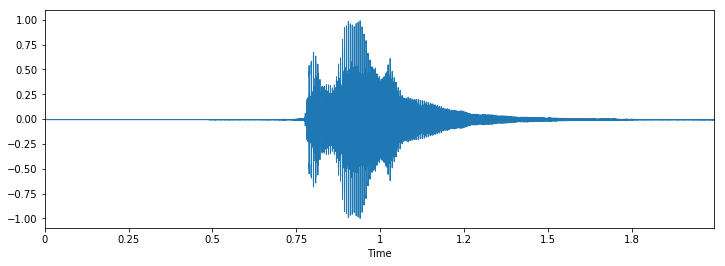

In [230]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(X_2, sr=sr_2)

In [231]:
X_user_test=librosa.feature.mfcc(y=X_2,sr=sr_2,n_mfcc=128)
X_user_test.shape

(128, 87)

In [232]:
X_user_test

array([[-5.44169192e+02, -5.44169192e+02, -5.44169192e+02, ...,
        -5.05226711e+02, -4.98050423e+02, -4.94653732e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.54879929e+01,  4.69655333e+01,  5.24472392e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.12178199e+01,  1.82059647e+01,  2.38303126e+01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.92313770e+00,  4.78026859e-01,  4.86026572e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.82813783e-01, -1.16569839e+00, -9.62239758e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.28388710e+00, -2.08989134e+00, -9.07979424e-01]])

In [233]:
y_user_test=[]
for i in range(0,128):
    y_user_test.append(1)

In [234]:
score=model.evaluate(X_user_test,y_user_test,verbose=0)

In [235]:
score

[0.8834355771541595, 0.640625]

In [236]:
if score[1]>0.75:
    print("Access Granted")
    print("Welcome Nishant")
else:
    print("Access Denied")

Access Denied
